In [16]:
%%bash

mamba install -y -q -c bioconda bedtools metilene ipyigv 
pip install -q plotly jbrowse_jupyter biopython tqdm

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


---
title: Esercitazione 3 
authors:
    - name: Samuele Greco
      email: samuele.greco@units.it
---

# Epigenetica
---

L'epigenetica è un ramo della biologia che studia le modifiche ereditabili dell'espressione genica che non alterano la sequenza del DNA. Tali modifiche, definite epigenetiche (*epi-*, sopra), influenzano il modo in cui i geni vengono attivati o silenziati e possono essere trasmesse attraverso le generazioni cellulari. Ciò implica che l'attivazione o l'inattivazione di geni cruciali per lo sviluppo o il funzionamento delle cellule può essere regolata non solo dalla sequenza genetica stessa, ma anche dalle condizioni ambientali e dallo stile di vita, che influiscono su questi cambiamenti.

Esistono vari tipi di modificazioni epigenetiche che hanno effetti significativi sull'espressione genica:

1. **Modificazioni degli istoni**: Gli istoni sono proteine attorno alle quali il DNA si avvolge per formare la cromatina. Possono subire diverse modifiche chimiche, tra cui l'acetilazione, la metilazione, la fosforilazione e l'ubiquitinazione. L'acetilazione, ad esempio, tende a rendere il DNA più accessibile ai fattori di trascrizione, attivando l'espressione genica. La metilazione degli istoni, a seconda del tipo di modificazione, può sia attivare che reprimere i geni. Un tipo di analisi molto usato per rilevare questo tipo di modificazioni è la [**Chromatin Immuno Precipitation (ChIP)**](https://it.wikipedia.org/wiki/Immunoprecipitazione_della_cromatina).

2. **RNA non codificanti**: Gli RNA non codificanti, come i microRNA e i RNA lunghi non codificanti (lncRNA), possono regolare l'espressione genica interagendo con altre molecole di RNA o proteine. Possono destabilizzare le molecole di RNA messaggero (mRNA), inibire la traduzione o interferire con la cromatina per modulare l'accessibilità ai geni.

3. **Riarrangiamento della cromatina**: Alcune proteine specializzate sono in grado di rimodellare la struttura della cromatina per renderla più o meno accessibile ai fattori di trascrizione. Questo processo consente di regolare l'espressione genica adattando l'organizzazione del genoma a livello nucleare e consiste principalmente in scorrimento, espulsione e riposizionamento dei [**nucleosomi**](https://it.wikipedia.org/wiki/Nucleosoma).

4. **Metilazione del DNA**: Uno dei meccanismi epigenetici più studiati è la metilazione del DNA. Questo processo comporta l'aggiunta di un gruppo metilico (-CH₃) a una citosina presente nelle sequenze CpG del DNA. Tale modifica agisce generalmente reprimendo l'espressione genica, spesso bloccando i fattori di trascrizione o reclutando proteine che reprimono l'attività trascrizionale. La metilazione svolge un ruolo chiave nello sviluppo, nella differenziazione cellulare e nella regolazione genica. Un'alterazione anomala della metilazione è spesso correlata a malattie come il cancro, l'autismo e le malattie autoimmuni.

L'insieme di questi meccanismi epigenetici permette alle cellule di rispondere rapidamente agli stimoli ambientali, ma la loro regolazione anomala può portare a disfunzioni e patologie complesse.

:::{note}CpG islands
Le isole CpG sono tratti di DNA caratterizzati da una concentrazione elevata di coppie di basi citosina-guanina. Queste isole si trovano spesso nelle regioni promotrici dei geni, cioè nelle aree dove inizia la trascrizione del DNA per la sintesi dell’RNA
:::

## Analisi di metilazione del DNA

Questa esercitazione è basata sullo studio [Li *et. al.*, 2015](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118453).

Questo studio ha esplorato le alterazioni epigenetiche associate al cancro al seno, concentrandosi in particolare sui modelli di metilazione del DNA nei diversi tipi di tessuto mammario e di tumori associati. I ricercatori hanno utilizzato il sequenziamento dell'intero genoma trattato con bisolfito di sodio (whole-genome bisulfite sequencing) per analizzare e confrontare i metilomi (profili completi di metilazione del DNA) del tessuto mammario normale, tessuto mammario tumorale e della linea cellulare di cancro al seno MCF7. Per semplicità confronteremo solo tessuto tumorale con tessuto normale. 

:::{note} Bisulfite sequencing
In questo metodo, il DNA viene trattato con bisolfito di sodio, che converte la citosina non metilata in uracile, mentre le citosine metilate rimangono invariate. Durante il sequenziamento successivo, le citosine non metilate appaiono come timine, consentendo di distinguere tra le basi metilate e non metilate e fornendo un profilo dettagliato delle regioni metilate nel genoma. [Pagina Wikipedia](https://en.wikipedia.org/wiki/Bisulfite_sequencing)
:::

### Sequenziamento e preparazione delle read

Nella prima parte dell'esperimento (che qui saltiamo per ragioni di tempo, abbiamo già visto questi meccanismi) il DNA è stato trattato con bisolfito di sodio e successivamente sequenziato. Le read di sequenziamento, quando sottoposte a controllo qualità producevano il seguente grafico di composizione nucleotidica:

:::{figure}https://training.galaxyproject.org/training-material/topics/epigenetics/images/fastqc.png
:::

:::{warning}Domanda
Ci vedete qualcosa di strano rispetto a quelle che abbiamo visto la scorsa volta?
:::

Le read sono state poi **trimmate** e **mappate** sul genoma umano di riferimento con un allineatore in grado di tollerare le mutazioni C→T indotte dal bisolfito di sodio e di quantificare quindi anche gli eventi di metilazione delle citosine. 

## Analisi di metilazione differenziale 

Ora scaricheremo il dataset pre-processato per andare a valutare le differenze di metilazione a livello dei geni e scoprire se tra le diverse condizioni sperimentali dei campioni esistoni differenze significative ed eventualmente determinare i geni la cui metilazione/demetilazione determina un certo fenotipo.

Il comando nella cella successiva scarica i file e li ordina al volo usando bedtools.

:::{dropdown}BEDtools
Bedtools è una raccolta di strumenti software progettati per l'analisi e la manipolazione di file in formato BED (Browser Extensible Data), un formato comunemente utilizzato per rappresentare regioni genomiche. Bedtools offre una serie di funzionalità, come l'intersezione, il confronto e la sottrazione di regioni genomiche, consentendo agli utenti di eseguire operazioni complesse sui dati di genomica e bioinformatica. Questi strumenti sono ampiamente impiegati nella ricerca genomica per compiti quali l'identificazione di sovrapposizioni tra annotazioni genomiche, la creazione di regioni uniche o la combinazione di dati da diversi esperimenti.
:::

In [103]:
%%bash

curl https://zenodo.org/records/557099/files/NB2_CpG.meth.bedGraph?download=1 | bedtools sort -i - > NB2.bedgraph
curl https://zenodo.org/records/557099/files/NB1_CpG.meth.bedGraph?download=1 | bedtools sort -i - > NB1.bedgraph
curl https://zenodo.org/records/557099/files/BT089_CpG.meth.bedGraph?download=1 | bedtools sort -i - > BT089.bedgraph
curl https://zenodo.org/records/557099/files/BT126_CpG.meth.bedGraph?download=1 | bedtools sort -i - > BT126.bedgraph

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  6639k      0  0:01:59  0:01:59 --:--:-- 11.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  441M  100  441M    0     0  7520k      0  0:01:00  0:01:00 --:--:-- 11.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  705M  100  705M    0     0  6269k      0  0:01:55  0:01:55 --:--:-- 11.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  566M  100  566M    0     0  4263k      0  0:02:16  0:02:16 --:--:-- 11.7M


Adesso scarichiamo anche un file in formato `bed` che contiene le coordinate delle cpg islands già precalcolate per il genoma umano, questo servirà per limitare la ricerca di regioni differenzialmente metilate su *loci* predefiniti, semplificando il lavoro. 
La cella successiva produce anche un'anteprima del file `cpg_islands.bed`

In [104]:
%%bash
curl https://zenodo.org/records/557099/files/CpGIslands.bed?download=1 > cpg_islands.bed
head cpg_islands.bed

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  794k  100  794k    0     0  1784k      0 --:--:-- --:--:-- --:--:-- 1786k


1	28735	29737	CpG:_111
1	135124	135563	CpG:_30
1	199251	200121	CpG:_104
1	368792	370063	CpG:_99
1	381172	382185	CpG:_84
1	491107	491546	CpG:_29
1	597839	598734	CpG:_94
1	609358	611269	CpG:_171
1	778604	779167	CpG:_60
1	827036	828065	CpG:_111


### identificazione delle regioni differenzialmente metilate (DMRs)
Useremo ora lo strumento **metilene** per trovare le regioni differenzialmente metilate tra la condizione normale e quella tumorale. Verrà effettuato un test statistico, utile per dare un peso alle nostre osservazioni, permettendoci di ridurre il più possibile il rumore di fondo ed i falsi positivi. Il test statistico in questione è il [Test di Wilcoxon Mann Whitney](https://it.wikipedia.org/wiki/Test_di_Wilcoxon-Mann-Whitney), che ci fornirà un valore detto [p-value](https://it.wikipedia.org/wiki/Valore_p) corretto col metodo di [Bonferroni](https://it.wikipedia.org/wiki/Correzione_di_Bonferroni). 

Innanzitutto metilene richiede la creazione di un unico file che definisca i valori di metilazione delle regioni genomiche ed i raggruppamenti dei campioni:

In [105]:
%%bash
metilene_input.pl --in1 BT089.bedgraph,BT126.bedgraph --in2 NB1.bedgraph,NB2.bedgraph --h1 tumor --h2 normal

[WARNING]	Fri May 10, 13:35:16, 2024	Input files need to be SORTED, i.e., use "bedtools sort -i file >file.sorted"
[INFO]	Fri May 10, 13:35:16, 2024	Checking flags


/opt/conda/bin/bedtools


[INFO]	Fri May 10, 13:35:16, 2024	Write metilene input to metilene_tumor_normal.input

*****

[BASIC CALL:] metilene_executable -t 4 -a tumor -b normal metilene_tumor_normal.input >out.file
Please adjust executable of metilene, number of threads (-t) and names of groups (-a, -b). For further parameters: metilene_executable --help


Il comando sopra creerà il file `metilene_normal_tumor.input`, che usiamo nella cella successiva per calcolare le regioni differenzialmente metilate. 
Come vedete, il comando sotto è in realtà una **pipeline** di comandi, che si passano gli output. Di default, metilene produce i messaggi di log e gli output come testo visibile, cosa che se incontrollata bloccherebbe questa pagina. Quindi con '2>' diciamo di scrivere i log nel file `metilene.log` e con ol carattere `|` passiamo l'output relativo alle regioni metilate al comando sort, che si occuperà di ordinare i risultati per cromosoma e significatività, salvando poi il risultato finale nel file `metilene.output.tsv`

In [106]:
%%bash
metilene -t 4 -f 2 -a tumor -b normal -B cpg_islands.bed metilene_normal_tumor.input 2> metilene.log | sort -V -k1,1 -k2,2n > metilene.output.tsv

ora passiamo questo file al comando `metilene_output.pl` che lo filtrerà e fornirà un piccolo report dei risultati

In [107]:
%%bash
metilene_output.pl -q metilene.output.tsv -a tumor -b normal

[INFO]	Fri May 10, 13:41:42, 2024	Checking flags
[INFO]	Fri May 10, 13:41:42, 2024	Filter DMRs.
[INFO]	Fri May 10, 13:41:42, 2024	Wrote 774 DMRs with adj. p-value<0.05, a minimum absolute difference>=0.1, a minimum length [CpG]>=10 and a minimum length [nt]>=0
[INFO]	Fri May 10, 13:41:42, 2024	Bedgraph file containing DMR difference: /home/jovyan/work/metilene_qval.0.05.bedgraph
[INFO]	Fri May 10, 13:41:42, 2024	Plot DMR statistics.
Warning message:
Removed 2 rows containing missing values (`geom_bar()`). 
Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 


null device 
          1 


Ora possiamo visualizzare i risultati aprendo la tabella `metilene_qval.0.05.out` e processarli con python nella cella successiva

In [108]:
import pandas as pd 
import plotly.express as px 
import numpy as np
from jbrowse_jupyter import launch, create
header = [
    'chr', 'start', 'stop', 'q-value',
    'mean methylation difference', '#CpGs',
    'mean tumor', 'mean normal'
]
dmrs = pd.read_csv("metilene_qval.0.05.out", sep = "\t", names = header)
dmrs.head()

,chr,start,stop,q-value,mean methylation difference,#CpGs,mean tumor,mean normal
0,1,1032586,1034858,1.469000e-03,-0.260630,66,0.26177,0.522400
1,1,1162663,1165204,3.472000e-26,-0.474782,100,0.25210,0.726880
2,1,1173934,1174765,7.747500e-04,0.365682,24,0.76420,0.398520
3,1,1332055,1333606,1.545200e-03,-0.108488,103,0.43000,0.538490
4,1,2290759,2291130,9.162300e-04,0.461399,19,0.48649,0.025089


Adesso disegnamo un **volcano plot**, che mette in relazione le differenze in metilazione con la significatività di tali differenze. Sull'asse $x$ avremo la differenza di metilazione, mentre sull'asse $y$ applicheremo la trasformazione $-log$ al *p-value* per renderlo lineare e direttamente proporzionale alla significatività:


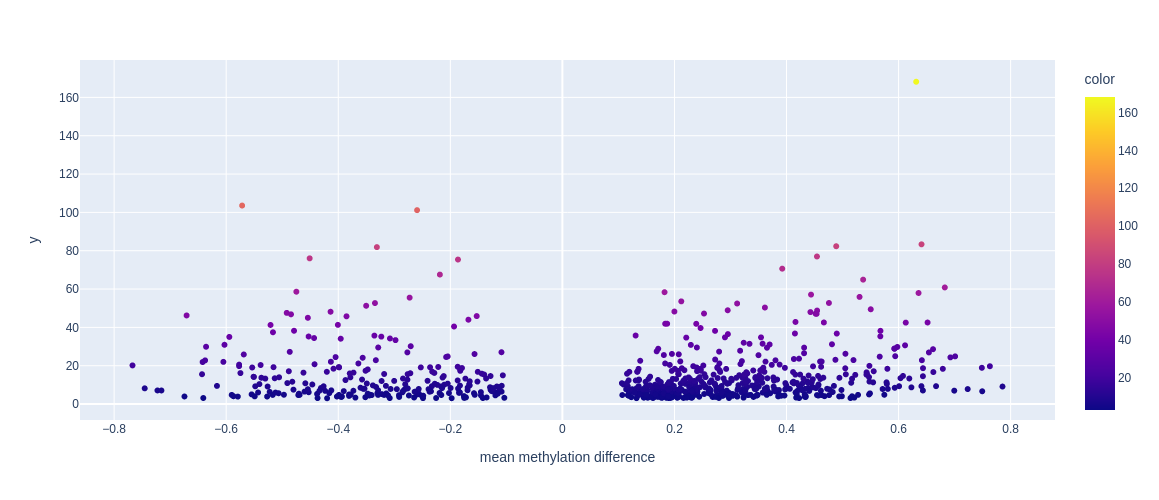

In [109]:
fig = px.scatter(dmrs, x = "mean methylation difference", y = -np.log(dmrs['q-value']), color = -np.log(dmrs['q-value']), 
                 width = 500, height = 500, hover_data=['chr', 'start','stop'])
fig.show()

Ora potremmo prendere le coordinate delle cpg islands più significative e valutare nei pressi di quali geni si trovino utilizzando un genome browser tipo quello di [UCSC](https://genome-euro.ucsc.edu/cgi-bin/hgGateway?hgsid=338735253_twmomjfQodaHIDEhB8IrH8OxZGDJ). La maggior parte delle volte, però, i risultati di questo tipo di analisi comprendono decine, centinaia o migliaia di geni. Cercarli uno ad uno nei genome browser sarebbe un'operazione estremamente noiosa e ripetitiva che aumenterebbe la possibilità di errore umano. 

Scarichiamo le annotazioni del genoma umano per recuperare più velocemente i geni e le loro funzioni:

In [110]:
!curl https://ftp.ensembl.org/pub/release-111/gff3/homo_sapiens/Homo_sapiens.GRCh38.111.gff3.gz | gunzip - > hg38.gff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43.9M  100 43.9M    0     0  15.0M      0  0:00:02  0:00:02 --:--:-- 15.0M


In [111]:
!head hg38.gff

##gff-version 3
##sequence-region   1 1 248956422
##sequence-region   10 1 133797422
##sequence-region   11 1 135086622
##sequence-region   12 1 133275309
##sequence-region   13 1 114364328
##sequence-region   14 1 107043718
##sequence-region   15 1 101991189
##sequence-region   16 1 90338345
##sequence-region   17 1 83257441


ora possiamo sfruttare python per incrociare le posizioni delle nostre CpG island di interesse con quelle dei geni e fare anche una rappresentazione grafica dei risultati più significativi:

/tmp/ipykernel_114229/3144612680.py:25: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_114229/3144612680.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



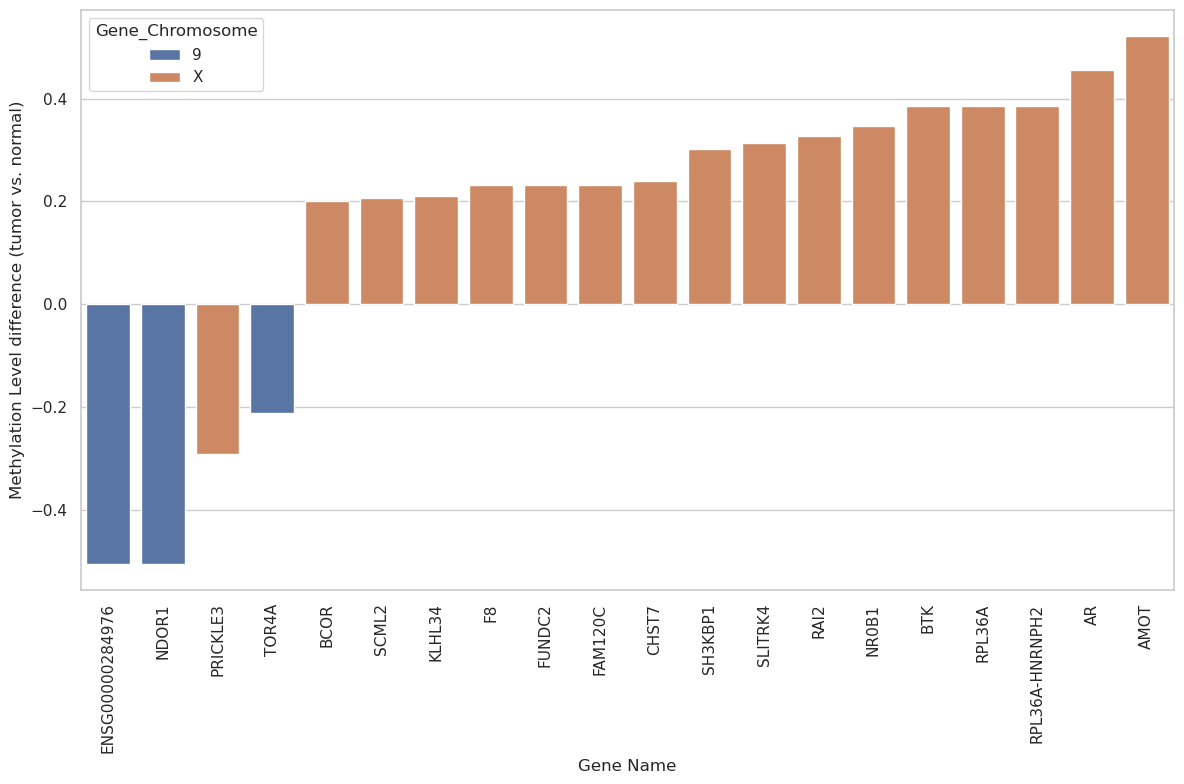

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

def extract_gene_name(attributes):
    """Extract the gene name from the GFF attributes field."""
    match = re.search(r'Name=([^;]+)', attributes)
    if match:
        return match.group(1)
    else:
        # If gene_name is unavailable, you could use other attributes like gene_id as a fallback
        match = re.search(r'gene_id=([^;]+)', attributes)
        return match.group(1) if match else "Unknown"

def load_cpg_islands(bedgraph_file):
    """Load CpG islands from a BEDGraph file into a pandas DataFrame."""
    return pd.read_csv(
        bedgraph_file, sep="\t", header=None,
        names=["Chromosome", "Start", "End", "MethylationLevel"]
    )

def load_genes_from_gff(gff_file):
    """Load genes from a GFF file into a pandas DataFrame."""
    gff_data = pd.read_csv(
        gff_file, sep="\t", comment="#", header=None,
        names=["Chromosome", "Source", "Feature", "Start", "End", "Score", "Strand", "Frame", "Attributes"]
    )

    # Filter to only include gene features
    genes_data = gff_data[gff_data["Feature"] == "gene"]
    genes_data["GeneName"] = genes_data["Attributes"].apply(extract_gene_name)
    return genes_data[["Chromosome", "Start", "End", "Strand", "Attributes", "GeneName"]]

def find_genes_near_cpg_islands(gff_file, bedgraph_file, distance_threshold=1000):
    """Find genes near CpG islands with methylation levels using pandas."""
    # Load CpG islands and genes
    cpg_islands = load_cpg_islands(bedgraph_file)
    genes = load_genes_from_gff(gff_file)

    # Create an empty list to collect results
    results = []

    # Iterate through CpG islands to find nearby genes
    for _, island in cpg_islands.iterrows():
        chrom = island["Chromosome"]
        start = island["Start"] - distance_threshold
        end = island["End"] + distance_threshold
        methylation_level = island["MethylationLevel"]

        # Identify genes on the same chromosome and within the threshold range
        nearby_genes = genes[
            (genes["Chromosome"] == chrom) &
            ((genes["Start"] >= start) & (genes["Start"] <= end) |
             (genes["End"] >= start) & (genes["End"] <= end))
        ]

        for _, gene in nearby_genes.iterrows():
            results.append({
                "Gene_Chromosome": gene["Chromosome"],
                "Gene_Start": gene["Start"],
                "Gene_End": gene["End"],
                "CpG_Chromosome": island["Chromosome"],
                "CpG_Start": island["Start"],
                "CpG_End": island["End"],
                "Strand": gene["Strand"],
                "Attributes": gene["Attributes"],
                "Methylation_Level": methylation_level,
                "Gene_Name": gene["GeneName"]
            })

    # Return the results as a DataFrame
    return pd.DataFrame(results)


def plot_methylation_by_gene(data):
    """Plot a single barplot with bars colored by methylation levels."""
    # Sort data by chromosome and gene name to keep a logical order
    sorted_data = data.sort_values(by=["Methylation_Level", "Gene_Name"])
    # Create a bar plot using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x="Gene_Name", y="Methylation_Level", data=sorted_data,
        hue = "Gene_Chromosome"
    )

    # Rotate x-axis labels for readability
    plt.xticks(rotation=90)
    plt.xlabel("Gene Name")
    plt.ylabel("Methylation Level difference (tumor vs. normal)")

    plt.tight_layout()
    plt.show()

genes_near_islands = find_genes_near_cpg_islands("hg38.gff", "metilene_qval.0.05.bedgraph", distance_threshold=1000)
plot_methylation_by_gene(genes_near_islands)
